In [1]:
import subprocess
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.mlab import specgram
from scipy.io import wavfile
from IPython.display import Audio, display

In [2]:
%matplotlib inline
plt.rcParams.update({'font.size': 18})

In [3]:
subprocess.run('curl -O http://s1download-universal-soundbank.com/wav/12976.wav', 
               shell=True)

CompletedProcess(args='curl -O http://s1download-universal-soundbank.com/wav/12976.wav', returncode=0)

In [4]:
subprocess.run('ffmpeg -i "12976.wav" -ac 1 -f wav sax_riff_mono.wav', 
               shell=True)

CompletedProcess(args='ffmpeg -i "12976.wav" -ac 1 -f wav sax_riff_mono.wav', returncode=0)

In [5]:
rate, song_array = wavfile.read('sax_riff_mono.wav')

In [6]:
def calc_specgram(song_array, NFFT, Fs, noverlap):
    spec, freqs, t = specgram(song_array, NFFT=NFFT, Fs=Fs, noverlap=noverlap)
    Z = 10.0 * np.log10(spec)
    Z = np.flipud(Z)
    extent = 0, np.amax(t), freqs[0], freqs[-1]
    return Z, spec, freqs, t, extent

In [7]:
def show_specgram(Z, cmap, extent):
    fig = plt.figure(figsize=(10, 8), facecolor='white')
    plt.imshow(Z, cmap=cmap, extent=extent)
    plt.xlabel('Time bin [s]')
    plt.ylabel('Frequency [Hz]')
    plt.axis('auto')
    plt.show()

In [8]:
def cut_specgram(min_freq, max_freq, spec, freqs):
    spec_cut = spec[(freqs >= min_freq) & (freqs <= max_freq)]
    freqs_cut = freqs[(freqs >= min_freq) & (freqs <= max_freq)]
    Z_cut = 10.0 * np.log10(spec_cut)
    Z_cut = np.flipud(Z_cut)
    extent_cut = 0, np.amax(t), freqs_cut[0], freqs_cut[-1]
    return Z_cut, spec_cut, freqs_cut, extent_cut

In [11]:
Z, spec, freqs, t, extent = calc_specgram(song_array, 4096, rate, 2048)

In [12]:
Z_cut, spec_cut, freqs_cut, extent_cut = cut_specgram(0, 4000, spec, freqs)

In [13]:
display(Audio(data=song_array, rate=rate))

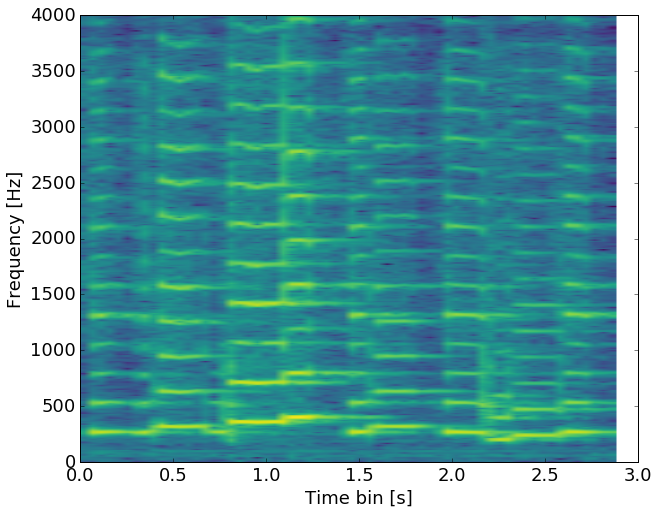

In [14]:
show_specgram(Z_cut, 'viridis', extent_cut)